<a href="https://colab.research.google.com/github/jesusGS01/YoloV11/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing YOLO v11

Author: Jesús García Salmerón


### Installing dependencies

In [1]:
pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 13.0 MB/s eta 0:00:00


### Training model

In [2]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.7MB/s]


Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 433k/433k [00:00<00:00, 10.3MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 3395.65file/s]

Dataset download success ✅ (0.4s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1816.11it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 683.42it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.32G      1.006      3.248      1.368         30        640: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all          4         17      0.578       0.85      0.878      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.3G      1.308      4.048        1.6         35        640: 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          4         17       0.58       0.85      0.851      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.29G      1.139      3.157      1.597         18        640: 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all          4         17      0.579       0.85      0.855       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.29G      1.024      2.538      1.257         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.06it/s]

                   all          4         17      0.565       0.85      0.857      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       1.3G      1.133      2.248      1.474         32        640: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]

                   all          4         17       0.61      0.931      0.906      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.29G      1.065      3.213      1.473         29        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          4         17      0.548       0.85      0.857       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.3G      1.234      2.877      1.599         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          4         17      0.551      0.854      0.859      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.29G      1.065      2.903       1.56         25        640: 100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all          4         17      0.562      0.863       0.86      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.29G     0.9837       1.57      1.325         27        640: 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all          4         17      0.561      0.867       0.86      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.29G      1.392      3.284      1.706         40        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all          4         17      0.587      0.867      0.861      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.29G      1.052      2.577      1.486         12        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          4         17      0.592      0.867      0.862      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.29G      1.178      2.197      1.467         26        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all          4         17      0.593      0.867      0.859      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       1.3G      1.287       2.21      1.567         32        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          4         17      0.597      0.867       0.86      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.29G     0.7551      2.397      1.221         10        640: 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all          4         17      0.596      0.867      0.872      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       1.3G      1.069      2.335       1.33         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.84it/s]

                   all          4         17      0.606      0.867      0.887      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.29G      1.189      2.159      1.532         30        640: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.75it/s]

                   all          4         17      0.611      0.867      0.881       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.29G      1.195       2.97      1.614         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.66it/s]

                   all          4         17      0.608      0.867      0.881      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.29G      1.001      2.197      1.429         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.19it/s]

                   all          4         17      0.608      0.867      0.881      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       1.3G      1.229      1.858      1.442         29        640: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.95it/s]

                   all          4         17      0.619      0.867      0.872       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.29G      1.075      2.038      1.334         39        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]

                   all          4         17      0.619      0.867      0.872       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.3G      1.047      2.138      1.521         26        640: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.36it/s]

                   all          4         17      0.808       0.65      0.868      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.29G     0.8004      1.543      1.107         28        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.94it/s]

                   all          4         17      0.808       0.65      0.868      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       1.3G     0.4594      1.847      1.024         12        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.76it/s]

                   all          4         17      0.774       0.65      0.881      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.29G     0.8699      1.169      1.293         19        640: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          4         17      0.774       0.65      0.881      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.3G      1.271       2.43      1.623         10        640: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.08it/s]

                   all          4         17      0.756       0.65      0.887      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.29G     0.8813      2.304      1.375         29        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.25it/s]

                   all          4         17      0.756       0.65      0.887      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.31G     0.9038      1.877      1.264         37        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.52it/s]

                   all          4         17      0.772       0.65      0.856       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.29G      1.089      1.601      1.382         26        640: 100%|██████████| 1/1 [00:00<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]

                   all          4         17      0.772       0.65      0.856       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.3G     0.9044       1.41      1.169         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.61it/s]

                   all          4         17      0.682       0.65      0.828       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       1.3G     0.9647      1.636      1.293         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.06it/s]

                   all          4         17      0.682       0.65      0.828       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.31G      1.077       1.72      1.379         30        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          4         17      0.708      0.625      0.831      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       1.3G     0.7666      1.515      1.287         16        640: 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.28it/s]

                   all          4         17      0.708      0.625      0.831      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       1.3G      1.132      2.336      1.449         30        640: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          4         17        0.7       0.63      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.29G     0.7952      1.578      1.152         43        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          4         17        0.7       0.63      0.818      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.31G     0.8425      1.303      1.083         41        640: 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.54it/s]

                   all          4         17      0.693      0.624      0.818      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.29G     0.5841      1.036      1.095         18        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.23it/s]

                   all          4         17      0.693      0.624      0.818      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.3G      1.134      1.837      1.352         20        640: 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]

                   all          4         17      0.579      0.568      0.736      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.29G     0.9456       1.06      1.224         36        640: 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          4         17      0.579      0.568      0.736      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       1.3G     0.6948      1.324      1.265         20        640: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.21it/s]

                   all          4         17      0.801      0.499      0.681      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.29G     0.8969       1.22      1.389         24        640: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all          4         17      0.801      0.499      0.681      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       1.3G     0.8696      1.268      1.234         27        640: 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all          4         17       0.82      0.495      0.622       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.29G     0.7867      1.037      1.142         34        640: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.23it/s]

                   all          4         17       0.82      0.495      0.622       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.31G      1.005      2.079       1.36         42        640: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.02it/s]

                   all          4         17      0.821      0.495       0.56      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       1.3G     0.6711      1.072      1.094         32        640: 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.78it/s]

                   all          4         17      0.821      0.495       0.56      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.3G     0.6107      1.008      1.083         12        640: 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.19it/s]

                   all          4         17      0.835      0.495       0.53      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.29G      0.742     0.9705      1.046         37        640: 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.56it/s]

                   all          4         17      0.835      0.495       0.53      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.31G     0.6683     0.8762      1.119         24        640: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.41it/s]

                   all          4         17      0.834      0.494      0.507      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.29G     0.8233      0.904      1.223         25        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.07it/s]

                   all          4         17      0.834      0.494      0.507      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       1.3G     0.7654       0.82      1.236         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.23it/s]

                   all          4         17      0.836      0.493      0.506      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       1.3G      0.845      1.177      1.206         32        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all          4         17      0.836      0.493      0.506      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       1.3G     0.8543      1.013      1.237         28        640: 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.74it/s]

                   all          4         17      0.843      0.493      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       1.3G     0.7024      1.087      1.167         25        640: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]

                   all          4         17      0.843      0.493      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       1.3G     0.5812     0.7109      1.007         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.63it/s]

                   all          4         17      0.843      0.493      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       1.3G     0.7766      1.324      1.248         15        640: 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all          4         17      0.851      0.492      0.507      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.29G     0.6747     0.8455      1.149         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         17      0.851      0.492      0.507      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       1.3G     0.8557       1.21      1.294         14        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]

                   all          4         17      0.851      0.492      0.507      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       1.3G     0.8811     0.9168      1.332         28        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all          4         17      0.852       0.49      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       1.3G     0.7514     0.9574      1.149         37        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          4         17      0.852       0.49      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       1.3G     0.7801      1.231      1.301         28        640: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.33it/s]

                   all          4         17      0.852       0.49      0.507       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.31G     0.6866     0.7265      1.104         33        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.59it/s]

                   all          4         17      0.852      0.485      0.508       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.29G     0.8648       1.33       1.23         40        640: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.24it/s]

                   all          4         17      0.852      0.485      0.508       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       1.3G     0.5193     0.7779      1.096         23        640: 100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.67it/s]

                   all          4         17      0.852      0.485      0.508       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       1.3G     0.7608     0.8781      1.145         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

                   all          4         17      0.767       0.41      0.483      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       1.3G     0.6326     0.5507      1.065         21        640: 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.96it/s]

                   all          4         17      0.767       0.41      0.483      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.31G     0.6605     0.8175      1.071         41        640: 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.68it/s]

                   all          4         17      0.767       0.41      0.483      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.31G     0.8878     0.9876      1.277         34        640: 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all          4         17      0.767      0.406      0.484      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.29G     0.6529     0.7771      1.177         16        640: 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          4         17      0.767      0.406      0.484      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       1.3G     0.9115     0.9802      1.291         31        640: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.42it/s]

                   all          4         17      0.767      0.406      0.484      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       1.3G     0.6644     0.7108     0.9704         37        640: 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all          4         17      0.765      0.404      0.483      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.29G     0.8523     0.8591      1.174         26        640: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.36it/s]

                   all          4         17      0.765      0.404      0.483      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       1.3G     0.6371     0.5884       1.14         24        640: 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all          4         17      0.765      0.404      0.483      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.31G      0.805     0.5771      1.182         31        640: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all          4         17      0.752      0.405      0.483      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       1.3G     0.5231     0.6959     0.9822         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          4         17      0.752      0.405      0.483      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       1.3G     0.7095       0.73      1.201         27        640: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.82it/s]

                   all          4         17      0.752      0.405      0.483      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       1.3G     0.8342     0.7282      1.571         11        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all          4         17      0.751      0.402      0.485      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.29G     0.7249     0.7704      1.121         28        640: 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all          4         17      0.751      0.402      0.485      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       1.3G     0.7895       0.81       1.29         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.06it/s]

                   all          4         17      0.751      0.402      0.485      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       1.3G     0.7702     0.7113      1.109         28        640: 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          4         17      0.743      0.403      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.29G     0.8547      1.058      1.313         27        640: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.96it/s]

                   all          4         17      0.743      0.403      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       1.3G      0.604     0.8794      1.084         30        640: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]

                   all          4         17      0.743      0.403      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       1.3G     0.5544     0.8662     0.9926         22        640: 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.09it/s]

                   all          4         17       0.74      0.409      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.29G     0.9214     0.7246      1.388         17        640: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          4         17       0.74      0.409      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.31G      1.031      1.685      1.341         34        640: 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.53it/s]

                   all          4         17       0.74      0.409      0.484      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       1.3G     0.8414     0.9388      1.216         33        640: 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.69it/s]

                   all          4         17      0.736      0.419      0.477       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.29G     0.5705     0.5906       1.08         24        640: 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          4         17      0.736      0.419      0.477       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.31G     0.6598      1.344      1.125         57        640: 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          4         17      0.736      0.419      0.477       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       1.3G     0.4125     0.5299       1.01         21        640: 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.11it/s]

                   all          4         17      0.736      0.419      0.477       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.31G     0.6283     0.7405      1.016         44        640: 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all          4         17      0.732      0.406      0.476      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.29G     0.6881     0.6461      1.126         29        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

                   all          4         17      0.732      0.406      0.476      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       1.3G     0.5818     0.5986      1.033         28        640: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.60it/s]

                   all          4         17      0.732      0.406      0.476      0.239


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       1.3G     0.4755     0.5536     0.9751         13        640: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]

                   all          4         17      0.732      0.406      0.476      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       1.3G     0.5694      0.588     0.9872         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all          4         17      0.741      0.427      0.489      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.29G      0.547     0.4424     0.9086         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all          4         17      0.741      0.427      0.489      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       1.3G     0.5217     0.4815     0.9655         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.24it/s]

                   all          4         17      0.741      0.427      0.489      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       1.3G     0.5266     0.5196      1.026         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all          4         17      0.741      0.427      0.489      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       1.3G     0.5231     0.5515      1.002         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.22it/s]

                   all          4         17      0.748       0.46      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.29G     0.5284     0.4913     0.8389         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          4         17      0.748       0.46      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       1.3G     0.4869     0.4923      1.005         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.20it/s]

                   all          4         17      0.748       0.46      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       1.3G     0.5162     0.5251      1.036         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.39it/s]

                   all          4         17      0.748       0.46      0.495       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       1.3G     0.6677     0.6805      1.115         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]

                   all          4         17      0.742      0.483      0.492       0.26



100 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.79it/s]


                   all          4         17      0.606      0.867      0.895      0.648
                person          3         10      0.658        0.7      0.647      0.321
                   dog          1          1      0.522          1      0.995      0.796
                 horse          1          2      0.619          1      0.995      0.676
              elephant          1          2      0.371        0.5      0.745        0.3
              umbrella          1          1      0.549          1      0.995      0.895
          potted plant          1          1      0.918          1      0.995      0.895
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


### Inference and Evaluation

In [11]:
import requests
from PIL import Image
from io import BytesIO

# Descargar la imagen desde GitHub (RAW URL)
url = "https://raw.githubusercontent.com/jesusGS01/YoloV11/main/road_cars.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Run inference with the YOLO11n model on the 'bus.jpg' image
results = model(img)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


0: 448x640 12 cars, 1 truck, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


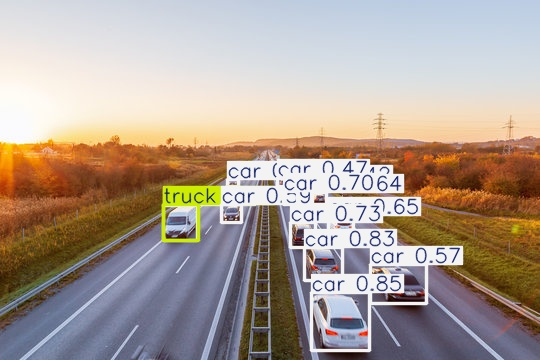

In [13]:
import cv2
from google.colab.patches import cv2_imshow

# Load image
img_result = cv2.imread("result.jpg")

# Show result image with predictions
cv2_imshow(img_result)